In [ ]:
Importer et inspecter les données

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [ ]:
Explorer les données : prendre connaissance du nombre de lignes et de colonnes, du type de data. Verifier qu'il n'y a pas de données manquantes ou de colonnes en doublons

In [4]:
all_data.shape

(96, 4)

In [5]:
all_data.info

<bound method DataFrame.info of      Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]>

In [7]:
print(all_data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [8]:
print(all_data.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [ ]:
Modification du nom d'une colonne qui est trop long 

In [9]:
all_data.rename(columns={
    'Life expectancy at birth (years)': 'life_length'},
    inplace=True)

In [10]:
print(all_data.head())

  Country  Year  life_length           GDP
0   Chile  2000         77.3  7.786093e+10
1   Chile  2001         77.3  7.097992e+10
2   Chile  2002         77.8  6.973681e+10
3   Chile  2003         77.9  7.564346e+10
4   Chile  2004         78.0  9.921039e+10


In [ ]:
Analyser la data et répondre aux question suivantes grâce aux graphiques : 
Quelle est l’évolution de l'espérance de vie au fil des années ?
Quelle est l’volution  de l'espérance de vie en lien avec GPD ?
Evolution du GPD des 6 pays au fils des années ?
Différences entre pays développés et non devellopés ?


In [13]:
all_data.describe(include='all')

,Country,Year,life_length,GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [ ]:
Il est possible d'étudier de chaque variable grâce aux histogrammes . Ici, histrogramme du GPD et de l'espérance de vie

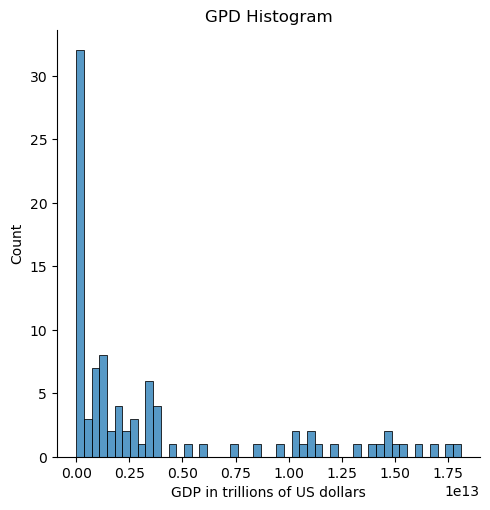

<Figure size 640x480 with 0 Axes>

In [14]:
sns.displot(all_data, x="GDP", bins=50)
plt.xlabel('GDP in trillions of US dollars')
plt.title('GPD Histogram')
plt.show()
plt.clf()

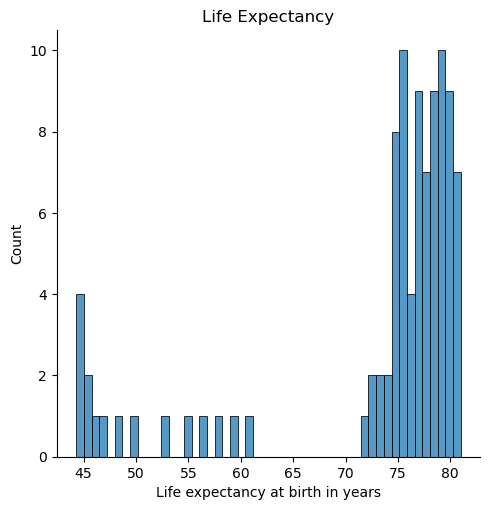

<Figure size 640x480 with 0 Axes>

In [15]:
sns.displot(all_data, x="life_length", bins=50)
plt.xlabel('Life expectancy at birth in years')
plt.title('Life Expectancy')
plt.show()
plt.clf()

In [ ]:
Nous allons ici visualiser l'esperance de vie par pays

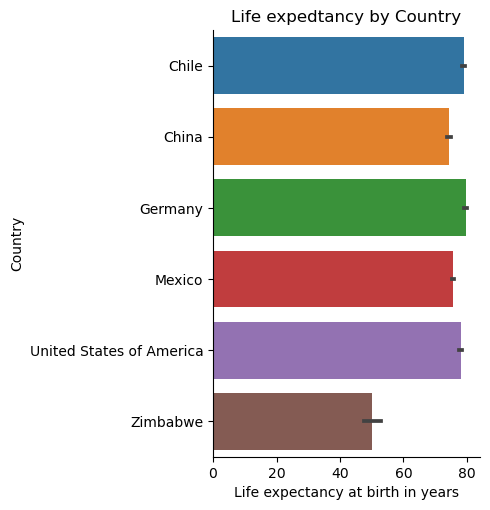

<Figure size 640x480 with 0 Axes>

In [17]:
sns.catplot(data=all_data, x="life_length", y="Country", kind="bar")
plt.title ('Life expedtancy by Country')
plt.xlabel ('Life expectancy at birth in years')
plt.show()
plt.clf()


In [ ]:
Nous pouvons voir que les esperances de vie des pays présentés sont à peut près équivalentes, sauf celle du Zimbabwe qui est bien inféreure.

In [ ]:
Nous allons par la suite étudier le GPD par pays.

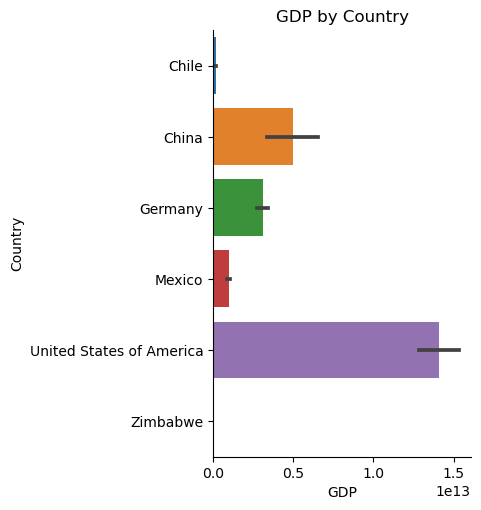

<Figure size 640x480 with 0 Axes>

In [19]:
sns.catplot(data=all_data, x="GDP", y="Country", kind="bar")
plt.title ('GDP by Country')
plt.xlabel ('GDP')
plt.show()
plt.clf()

In [ ]:
Nous constatons que le GDP des USA est bien plus important que celui des autres pays. Ceux du Zimbabwe puis du Chili sont moindres ...

In [ ]:
Plusieurs façon d'observer l'évolution de l'espérance de vie au fil des années, par pays

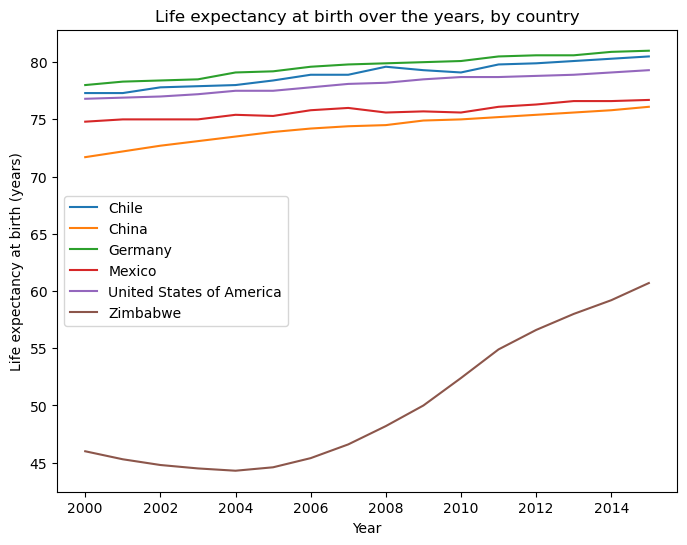

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(8,6))
sns.lineplot(x=all_data.Year, y=all_data["life_length"], hue=all_data.Country)
plt.legend(loc='center left')
plt.ylabel("Life expectancy at birth (years)")
plt.title('Life expectancy at birth over the years, by country')
plt.show()
plt.clf()

In [ ]:
Nous pouvons voir que tous les pays ont vu leurs espérances de vies augmenter au fil des années. Comme vu précédemment, les espérances de vies des USA, Chili, China, Allemagne et Mexico sont proches en termes d'années et ont une évolutions similaires. L'esperance de vie du Zimbabwe, bien qu'elle soit largement inférieure aux autres pays, a subit une augmentation importante à partir de 2008.

In [ ]:
Nous allons observer l'évolution du GPD au fil des années par pays

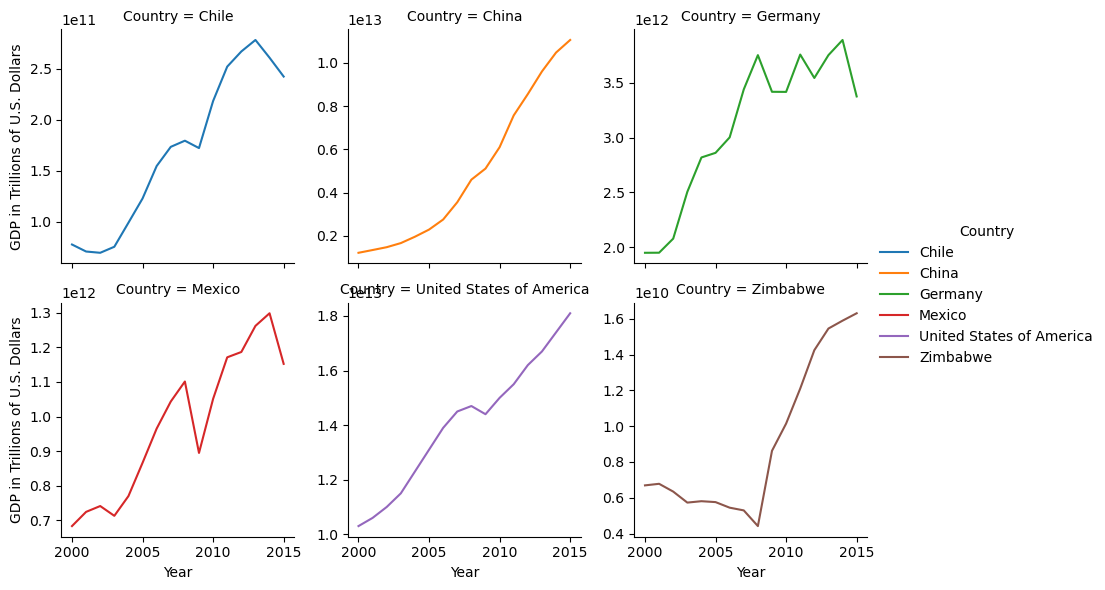

<Figure size 640x480 with 0 Axes>

In [23]:
graphGDP = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP
plt.show()
plt.clf()

In [ ]:
Nous pouvons voir que tous les GPD augmentent dès les années 2000 jusqu'à 2015. Néanmoins, tous les pays sauf la Chine ont subit des baisses 

In [ ]:
Mise en relation de l'espérance de vie et du GPD

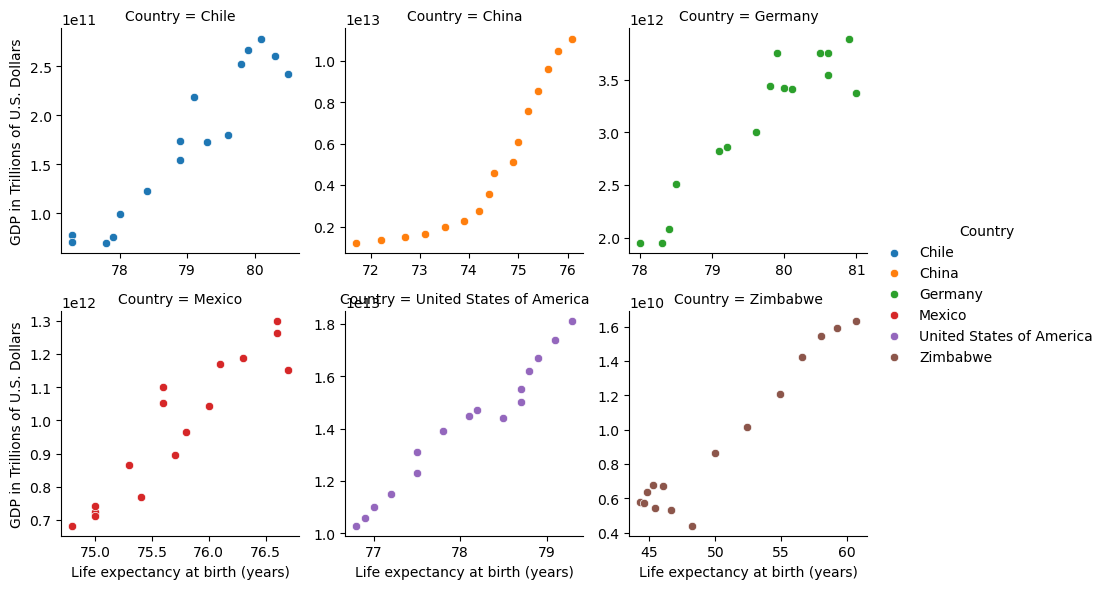

<Figure size 640x480 with 0 Axes>

In [28]:
graph = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"life_length", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));
plt.show()
plt.clf()

In [ ]:
Nous pouvons voir qu'il y a une relation entre l'esperance de vie et le gdP. En effet, plus le GPD est important, plus l'esperance de vie est longue.

In [ ]:
Grâce aux informations contenues dans le dataframe "all_data", nous pouvons constituer de nouvelles données. ici, nous souhaitons connaitre la différence entre l'esperance de vie des pays dévellopé et l'esperance de vie des pays en voie de devellopement

In [29]:
deved_country = all_data[(all_data.Country == 'United States of America') | (all_data.Country == 'Germany')].reset_index(drop=True)


In [36]:
deving_country = all_data[(all_data.Country == 'China') | (all_data.Country == 'Chile') | (all_data.Country == 'Zimbabwe')].reset_index(drop=True)


In [37]:
deved_country.Country.unique()

array(['Germany', 'United States of America'], dtype=object)

In [38]:
deving_country.Country.unique()

array(['Chile', 'China', 'Zimbabwe'], dtype=object)

In [39]:
print(deved_country.life_length.mean())


78.859375


In [40]:
print(deving_country.life_length.mean())


67.76666666666667


In [54]:
mean_df = pd.DataFrame({
    'status': ['developing', 'developed'],
    'mean_value': [69, 78],
})

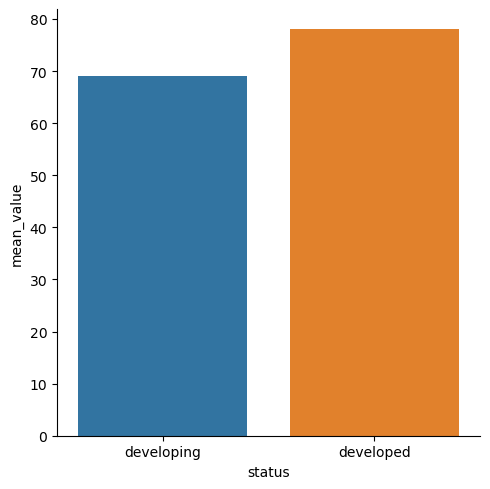

<Figure size 640x480 with 0 Axes>

In [62]:
sns.catplot(data= mean_df, x='status', y='mean_value', kind='bar')
plt.show()
plt.clf()

In [ ]:
Nous constatons qu'en moyenne, les pays dévellopés ont une esperance de vie plus importante que les pays en voie de devellopemenent.

In [ ]:
Nous pouvons voir que l’espérance de vie des six pays donnés est d’environ 79 ans, sauf au Zimbabwe où l’espérance de vie est de 50 ans. Mais après avoir examiné de près l’espérance de vie au Zimbabwe, nous constatons une forte croissance après 2004.
Comme le graphique montre les PIB des pays développés (États-Unis d’Amérique, Allemagne) et de certains pays en développement (Chine et Mexique) sont corrélés, mais pour le Zimbabwe et le Chili, la corrélation entre le PIB et l’espérance de vie est faible.
En général, les pays affichent une croissance du PIB. La Chine a enregistré une forte croissance du PIB après 2004 (voir informations complémentaires), le Chili et le Mexique affichent une croissance après 2004, et le Zimbabwe vers 2008-2009.
Avec une espérance de vie moyenne de 78 ans dans les pays développés et de 69 ans dans les pays en développement, nous avons une différence d’espérance de vie de 9 ans entre les pays en développement et les pays développés.
Même si nous n’avons que 96 observations de 6 pays, nous pourrions encore voir des tendances utiles dans l’ensemble de données donné.